In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score



%matplotlib inline

It would be interesting to find out the connection between emergency visits in the year before the hospitalization and such features  as race, gender, age, admission type, time in hospital and  HbA1c test results.

In [2]:
data = pd.read_csv(open("dataset_diabetes/diabetic_data.csv"))
n_samples = data.shape[0]

In [3]:
print ('Number of samples', n_samples)

Number of samples 101766


## Emergency visits

In [4]:
#Number of emergency visits of the patient in the year preceding the encounter

n_emergency = np.asarray(data['number_emergency'])
emergency_values = np.unique(n_emergency)

In [5]:
#Age intervals, for example [10, 20)

ages = np.asarray(data["age"])
ages_types = np.unique(ages)

In [6]:
probability = []
for age in ages_types:
    emergency = n_emergency[np.where(ages == age)]
    probability.append(emergency.sum() / len(emergency))
    print(age, emergency.sum() / len(emergency))

[0-10) 0.0310559006211
[10-20) 0.156295224313
[20-30) 0.578153289077
[30-40) 0.490331125828
[40-50) 0.356840474961
[50-60) 0.222473342605
[60-70) 0.162433838901
[70-80) 0.13108025165
[80-90) 0.144269349305
[90-100) 0.13104189044


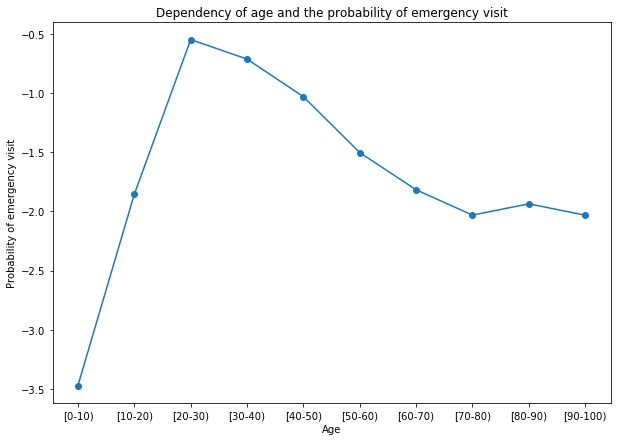

In [7]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.arange(len(ages_types)), np.log(probability), marker='o')
plt.xticks(np.arange(len(ages_types)), ages_types)
plt.title("Dependency of age and the probability of emergency visit")
plt.xlabel("Age")
plt.ylabel("Probability of emergency visit")

### LabelEncoding

In [8]:
LE = LabelEncoder()

In [9]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
s = 0
for column in data.columns:
    LE.fit(data[column])
    data[column] = LE.transform(data[column])
    s += 1

In [11]:
X, y = np.asarray(data[data.columns[2:-1]]), np.asarray(data['readmitted'])

### Data split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1, stratify=y)

### Label binarization 1

In [13]:
print ('Label encoding for readmitted', LE.classes_)

Label encoding for readmitted ['<30' '>30' 'NO']


In [14]:
y_bin_train = np.zeros(len(y_train))
y_bin_test = np.zeros(len(y_test))

for i in range(len(y_train)):
    if y_train[i] < 2:
        y_bin_train[i] = 1
    else:
        y_bin_train[i] = 0
        
for i in range(len(y_test)):
    if y_test[i] < 2:
        y_bin_test[i] = 1
    else:
        y_bin_test[i] = 0


### Only readmitted and non readmitted classification (Binary classification)

In [ ]:
# print('Fitting classifier')
# t0 = time()
# clf = SVC(kernel='linear')
# clf.fit(X_train, y_bin_train)
# print('Fitting is done in %0.3fs' % (time() - t0))

Fitting classifier


In [ ]:
# y_pred = clf.predict(X_test)

In [ ]:
# print ('Accuracy', list(clf.predict(X_test) == y_bin_test).count(True) / len(y_bin_test))

### PCA to visualize

In [ ]:
# n_components = 30

# t0 = time()
# pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
# print("PCA is done in %0.3fs" % (time() - t0))

# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)
# print("Transformation is done in %0.3fs" % (time() - t0))

In [ ]:
# x0 = [x[0] for x in X_train_tsne]
# x1 = [x[1] for x in X_train_tsne]
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_train]
# plt.figure(figsize=(10, 7))
# ax = plt.axes(frameon=False)
# plt.scatter(x0, x1, c=y_train, edgecolor = 'none', s = 5)
# plt.xlabel('x0')
# plt.ylabel('x1')
# ax.set_xlim([-2e14, 2e14])
# ax.set_ylim([-0.25e14, 0.25e14])
# plt.title('Data visualisation')

### t-SNE

In [ ]:
# tsne = TSNE(n_components=2, perplexity=45.0)
# X_train_tsne = tsne.fit_transform(X_train, y_train)

In [ ]:
# X_train_tsne

In [ ]:
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_train]

# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(111, projection='3d')


# ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c=y_train)
# plt.show()

### OneVsRestClassifier

In [ ]:
OVR = OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
print('Fitting classifier')
t0 = time()
OVR.fit(X_train, y_train)
print('Fitting is done in %0.3fs', % (time() - t0))

In [ ]:
y_pred = OVR.predict(X_test)

In [ ]:
print ('Accuracy', list(y_pred == y_test).count(True) / len(y_test))

### AdaBoost with binarization data (1 case)

In [ ]:
AB = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [ ]:
print('Fitting classifier')
t0 = time()
AB.fit(X_train, y_bin_train)
print('Fitting is done in %0.3fs', % (time() - t0))

In [ ]:
list(AB.predict(X_test) == y_bin_test).count(True) / len(y_bin_test)

### AdaBoost with random under-sampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
rus = RandomUnderSampler()
X_train_med_rus, y_bin_train_med_rus = rus.fit_sample(X_train_med, y_bin_train_med)
X_test_med_rus, y_bin_test_med_rus = rus.fit_sample(X_test_med, y_bin_test_med)



In [41]:
AB = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)
print('Fitting classifier')
t0 = time()
AB.fit(X_train_med_rus, y_bin_train_med_rus)
print('fitting is done in %s ' % (time() - t0))
print('Accuracy', list(AB.predict(X_test_med_rus) == y_bin_test_med_rus).count(True) / len(y_bin_test_med_rus))

Fitting classifier
fitting is done in 14.67971682548523 
Accuracy 0.5959507042253521


In [49]:
y_pred_proba = AB.predict_proba(X_test_med_rus)[:, 0]
precision_AB_rus, recall_AB_rus, _ = precision_recall_curve(y_true=y_bin_test_med_rus, probas_pred=y_pred_proba)

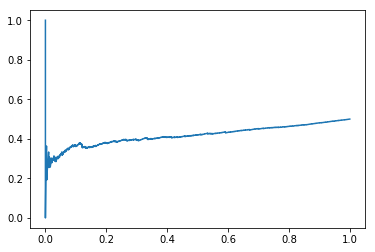

In [50]:
plt.plot(recall_AB_rus, precision_AB_rus)
plt.show()

### Relevant medical data

In [15]:
med_col = data.columns[12:-1]
X_med = np.asarray(data[med_col])

X_train_med, X_test_med, y_train_med, y_test_med = train_test_split(X_med, y, 
                                                                    test_size=0.1, random_state=1, stratify=y)

#### Another label binarization 2

In [16]:
y_bin_train_med = np.zeros(len(y_train_med))
y_bin_test_med = np.zeros(len(y_test_med))

for i in range(len(y_train_med)):
    if y_train_med[i] == 0:
        y_bin_train_med[i] = 1
    else:
        y_bin_train_med[i] = 0
        
for i in range(len(y_test_med)):
    if y_test_med[i] == 0:
        y_bin_test_med[i] = 1
    else:
        y_bin_test_med[i] = 0

### AdaBoost with relevant medical data (without undersampling, binarization 2)

In [51]:
AB = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [52]:
print('Fitting classifier')
t0 = time()
AB.fit(X_train_med, y_bin_train_med)
print('fitting is done in %s ' % (time() - t0))

Fitting classifier
fitting is done in 77.42531204223633 


In [53]:
list(AB.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med)

0.8881792276702368

In [56]:
y_pred_proba = AB.predict_proba(X_test_med)[:, 0]

In [59]:
precision_AB, recall_AB, _ = precision_recall_curve(y_true=y_bin_test_med, probas_pred=y_pred_proba)

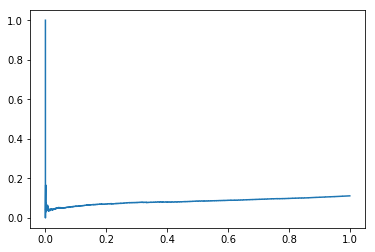

In [60]:
plt.plot(recall_AB, precision_AB)
plt.show()

### MLPClassifier

In [20]:
mlp = MLPClassifier(max_iter=1000, activation='logistic')

In [21]:
print('Fitting classifier')
t0 = time()
mlp.fit(X_train_med, y_bin_train_med)
print('fitting is done in %s ' % (time() - t0))

Fitting classifier
fitting is done in 8.980396032333374 


In [22]:
print('Accuracy', list(mlp.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med))

Accuracy 0.8884740100226


In [23]:
print ('Number of ones in test prediction', np.sum(mlp.predict(X_test_med)))
print ('Number of ones in y_test', np.sum(y_bin_test_med))

Number of ones in test prediction 1.0
Number of ones in y_test 1136.0


### Naive Bayes

In [24]:
NB = BernoulliNB()

In [25]:
print('Fitting classifier')
t0 = time()
NB.fit(X_train_med, y_bin_train_med)
print('fitting is done in %s ' % (time() - t0))

Fitting classifier
fitting is done in 0.14291000366210938 


In [26]:
list(NB.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med)

0.888375749238479

### Discriminant Analysis

In [ ]:
# QDA = QuadraticDiscriminantAnalysis()
# LDA = LinearDiscriminantAnalysis()

In [ ]:
# QDA.fit(X_train_med, y_bin_train_med)
# LDA.fit(X_train_med, y_bin_train_med)

In [ ]:
# print ('QDA accuracy', list(QDA.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med))
# print ('QDA accuracy', list(LDA.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med))

In [ ]:
# list(QDA.predict(X_test_med)).count(0)

In [ ]:
# list(LDA.predict(X_test_med)).count(0)

In [ ]:
# list(y_bin_test_med).count(0)

### Random forest classifier

In [27]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
t0 = time()
print("Fitting in forest..")
forest.fit(X_train_med, y_bin_train_med)
print("Done in %s seconds" %(time() - t0))

Fitting in forest..
Done in 19.325538873672485 seconds


In [28]:
list(forest.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med)

0.8881792276702368

Choosing the best parameter via grid search

In [29]:
print("Fitting the classifier to the training set..")
t0 = time()
param_grid = {'n_estimators': np.arange(5, 150, 10)}
forest = GridSearchCV(RandomForestClassifier(random_state=1), param_grid)
forest.fit(X_train_med, y_bin_train_med)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(forest.best_estimator_)

Fitting the classifier to the training set..
done in 513.364s
Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=145, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)


In [30]:
print ('Accuracy', list(forest.best_estimator_.predict(X_test_med) == y_bin_test_med).count(True) / len(y_bin_test_med))

Accuracy 0.8886705315908421
